作業做 lesson 8 範例四，兩個 beta 分佈可以做兩組（範例只有 1 組），參數設定可以差多點，看之間的差異

練習裡的樣本數可以做多一點，老師只做了 100，500，1000，可以多做 300 之類

minimize 的 method 可以多用幾個，拿來比較

cupy：用 gpu 跑 \
numpy：用 cpu 跑

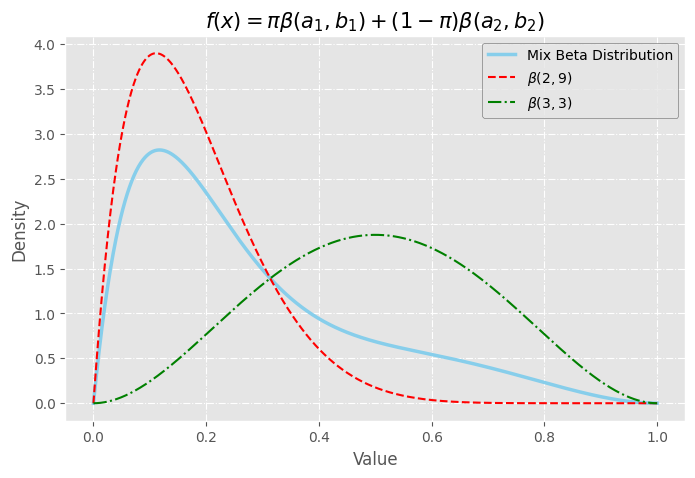

In [ ]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

size = 1000
p = 0.7
a1, b1 = 2, 9
a2, b2 = 3, 3
f = lambda x: p * beta.pdf(x, a1, b1) + (1 - p) * beta.pdf(x, a2, b2)
x = np.linspace(0, 1, 1000)
y = f(x)
fig = plt.figure(figsize = (8, 5))
plt.plot(x, y, color = 'skyblue', lw = 2.5, label = 'Mix Beta Distribution')
plt.plot(x, beta.pdf(x, a1, b1), color = 'red', lw = 1.5, linestyle = '--', label = '$\\beta(2, 9)$')
plt.plot(x, beta.pdf(x, a2, b2), color = 'green', lw = 1.5, linestyle = '-.', label = '$\\beta(3, 3)$')
plt.title('$f(x) = \\pi \\beta(a_1, b_1) + (1 - \\pi) \\beta(a_2, b_2)$', fontsize = 15)
plt.xlabel('Value', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.grid(True, linestyle = '-.')
plt.legend(prop = {'size': 10}, frameon = True, edgecolor = '#666666')
plt.show()

C:\Users\Sheng\AppData\Local\Temp\ipykernel_10708\2468763898.py:33: OptimizeWarning: Unknown solver options: tol
  result = minimize(neg_log_likelihood, params0, method = 'L-BFGS-B'


[0.77840457 1.93577185 7.7105543  4.86425597 3.77546028]


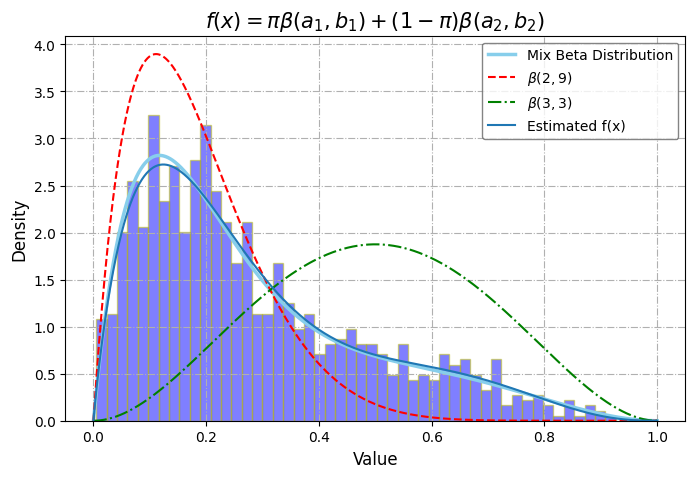

In [ ]:
from scipy.stats import beta, binom
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
n = 1000 # sample size
N = 100  # number of simulations
pi1 = 0.7
a1, b1 = 2, 9
a2, b2 = 3, 3

# 生成 mix beta distribution
f = lambda x: pi1 * beta.pdf(x, a1, b1) + (1 - pi1) * beta.pdf(x, a2, b2)
x = np.linspace(0, 1, 1000)
y = f(x)

# 生成來自 mix beta distribution 的資料
n1 = binom.rvs(n, pi1)
n2 = n - n1
x1 = beta.rvs(a1, b1, size = n1)
x2 = beta.rvs(a2, b2, size = n2)
X = np.concatenate([x1, x2])
# 定義出 mixed beta 對數概似函數
def neg_log_likelihood(params):
    pi1, a1, b1, a2, b2 = params
    f = lambda X: pi1 * beta.pdf(X, a1, b1) + (1 - pi1) * beta.pdf(X, a2, b2)
    return -np.sum(np.log(f(X)))
# 設定演算法初始設定
params0 = [0.7, 2, 9, 3, 3]
bnd = [(0, 1), (0, None), (0, None), (0, None), (0, None)]
opts = {'disp': False, 'maxiter': 8000, 'tol': 1e-6}
result = minimize(neg_log_likelihood, params0, method = 'Nelder-Mead'
                  , bounds = bnd, options = opts)
print(result.x)

# 繪圖
fig = plt.figure(figsize = (8, 5))
plt.plot(x, y, color = 'skyblue', lw = 2.5, label = 'Mix Beta Distribution')
plt.plot(x, beta.pdf(x, a1, b1), color = 'red', lw = 1.5, linestyle = '--', label = '$\\beta(2, 9)$')
plt.plot(x, beta.pdf(x, a2, b2), color = 'green', lw = 1.5, linestyle = '-.', label = '$\\beta(3, 3)$')
plt.hist(X, bins = 50, color = 'blue', edgecolor = 'y', alpha = 0.5, density = True)
plt.plot(x, result.x[0] * beta.pdf(x, result.x[1], result.x[2]) + \
         (1 - result.x[0]) * beta.pdf(x, result.x[3], result.x[4]), label = 'Estimated f(x)')
plt.title('$f(x) = \\pi \\beta(a_1, b_1) + (1 - \\pi) \\beta(a_2, b_2)$', fontsize = 15)
plt.xlabel('Value', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.grid(True, linestyle = '-.')
plt.legend(prop = {'size': 10}, frameon = True, edgecolor = '#666666')
plt.show()

### 不同樣本數對於 MLE 估計的差異（比較：平均）

In [ ]:
from scipy.stats import beta, binom
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 設定參數
pi1 = 0.7
a1, b1 = 2, 9
a2, b2 = 3, 3
n = [100, 300] # sample size
N = 100  # number of simulations

# 設定演算法初始設定
params0 = [0.7, 2, 9, 3, 3]
bnd = [(0, 1), (0, None), (0, None), (0, None), (0, None)]
opts = {'disp': False, 'maxiter': 8000, 'ftol': 1e-6}

mean_RESULT = np.zeros((len(n), len(params0)))

for j in range(len(n)):
    # 生成結果矩陣
    RESULT = np.zeros((N, 5))
    # 生成來自 mix beta distribution 的資料
    n1 = binom.rvs(n[j], pi1)
    SAMPLE = np.r_[beta.rvs(a1, b1, size = (n1, N)), \
                beta.rvs(a2, b2, size = (n[j] - n1, N))]

    for i in range(N):
        X = SAMPLE[:, i]

        f = lambda x: -np.sum(np.log(x[0] * beta.pdf(X, x[1], x[2]) + \
                                    (1 - x[0]) * beta.pdf(X, x[3], x[4])))

        result = minimize(f, params0, method = 'L-BFGS-B', \
                        bounds = bnd, options = opts)
        # print(result.x)
        RESULT[i, :] = result.x

    # Evaluation
    mean_RESULT[j, :] = np.mean(RESULT, axis = 0)

In [28]:
df = pd.DataFrame(mean_RESULT, columns = ['pi1', 'a1', 'b1', 'a2', 'b2'])
df.insert(0, 'n', n)
df.head()

,n,pi1,a1,b1,a2,b2
0,100,0.639712,4.462958,32.276961,20.169074,10.667591
1,300,0.658884,2.268261,11.054801,4.424192,3.546938


In [29]:
columns = pd.MultiIndex.from_product([['MEAN for n = 10000'], ['n', 'pi1', 'a1', 'b1', 'a2', 'b2']])
df.columns = columns
df.head()

MEAN for n = 10000                                                     
                   n       pi1        a1         b1         a2         b2
0                100  0.639712  4.462958  32.276961  20.169074  10.667591
1                300  0.658884  2.268261  11.054801   4.424192   3.546938

### 不同樣本數對於 MLE 估計的差異（比較：RMSE）

In [31]:
from scipy.stats import beta, binom
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 設定參數
pi1 = 0.7
a1, b1 = 2, 9
a2, b2 = 3, 3
n = [100, 300] # sample size
N = 100  # number of simulations

# 設定演算法初始設定
params0 = [0.7, 2, 9, 3, 3]
bnd = [(0, 1), (0, None), (0, None), (0, None), (0, None)]
opts = {'disp': False, 'maxiter': 8000, 'ftol': 1e-6}

mean_RESULT = np.zeros((len(n), len(params0)))
rmse_RESULT = np.zeros((len(n), len(params0)))

for j in range(len(n)):
    # 生成結果矩陣
    RESULT = np.zeros((N, 5))
    # 生成來自 mix beta distribution 的資料
    n1 = binom.rvs(n[j], pi1)
    SAMPLE = np.r_[beta.rvs(a1, b1, size = (n1, N)), \
                beta.rvs(a2, b2, size = (n[j] - n1, N))]

    for i in range(N):
        X = SAMPLE[:, i]

        f = lambda x: -np.sum(np.log(x[0] * beta.pdf(X, x[1], x[2]) + \
                                    (1 - x[0]) * beta.pdf(X, x[3], x[4])))

        result = minimize(f, params0, method = 'L-BFGS-B', \
                        bounds = bnd, options = opts)
        # print(result.x)
        RESULT[i, :] = result.x

    # Evaluation
    mean_RESULT[j, :] = np.mean(RESULT, axis = 0)
    rmse_RESULT[j, :] = np.sqrt(np.mean((RESULT - params0) ** 2, axis=0))

# 將結果轉換為 DataFrame 並設置變數名稱
df_mean = pd.DataFrame(mean_RESULT, columns=['pi1', 'a1', 'b1', 'a2', 'b2'])
df_rmse = pd.DataFrame(rmse_RESULT, columns=['pi1', 'a1', 'b1', 'a2', 'b2'])

# 添加 'n' 變數
df_mean.insert(0, 'n', n)
df_rmse.insert(0, 'n', n)

# 創建多層列標題
columns = pd.MultiIndex.from_product([['MEAN for n = 10000'], ['n', 'pi1', 'a1', 'b1', 'a2', 'b2']])

# 設置多層列標題
df_mean.columns = columns
df_rmse.columns = columns

# 顯示 DataFrame
print("Mean Results:")
print(df_mean.head())
print("\nRMSE Results:")
print(df_rmse.head())

Mean Results:
  MEAN for n = 10000                                                      
                   n       pi1        a1         b1          a2         b2
0                100  0.636452  4.871603  25.898552  196.705778  25.916616
1                300  0.666303  2.714156  13.066450    4.952155   3.613207

RMSE Results:
  MEAN for n = 10000                                                          
                   n       pi1         a1          b1           a2          b2
0                100  0.216482  24.959029  136.907829  1774.050542  172.555505
1                300  0.178927   4.886657   22.225846     7.049812    1.810394
